# Lab 3: Operations on NumPy arrays

Many machine learning algorithms need data to be represented as **arrays**. Once our data are represented as arrays, they are **operated** on to either build solutions during the learning stage or to make predictions during the deployment stage.

In Lab 2 we introduced **NumPy arrays**. NumPY arrays are a convenient way to represent homogeneous datasets, i.e. datasets where all the attributes are of the same type, for instance `float` or `int`. In this lab, we will explore some of the most important **mathematical operations** on NumPy arrays. These operations will allow us to implement solutions based on **matrix algebra** and are known as **vectorised operations**, as they operate on a whole array (*vectors*) rather than on individual values at a time.

The main operations that we will cover include:
- Arithmetic operations (addition, subtraction, etc)
- Matrix transposition
- Matrix multiplication
- Matrix inversion

We will use these operations to obtain the least squares solution of several linear and polynomial models. **Before attempting the lab**, make sure that you have read and understood the notes on mathematical notation and basic maths and have reviewed the lecture notes on regression.

# Numerical predictions with a polynomial model: A simple example

Consider the following cubic model:

$\begin{equation}
f(x) = -2-\frac{3}{2}x+\frac{3}{4}x^2+\frac{1}{4}x^3
\end{equation}$

Assume that this model is used to predict the value of a label $y$ given a predictor $x$, i.e. assume $\hat{y} = f(x)$. Let's use Python to calculate our model's prediction for three values of $x$, say $x=0, 1, 2$. We will start by implementing a **non-vectorised** approach:

In [2]:
y_0 = -2 - 0*3/2 + 0**2*3/4 + 0**3*1/4
print("The prediction for x=0 is:", y_0)
y_1 = -2 - 1*3/2 + 1**2*3/4 + 1**3*1/4
print("The prediction for x=1 is:", y_1)
y_2 = -2 - 2*3/2 + 2**2*3/4 + 2**3*1/4
print("The prediction for x=2 is:", y_2)

The prediction for x=0 is: -2.0
The prediction for x=1 is: -2.5
The prediction for x=2 is: 0.0


Do you understand how we have calculated the predictions $f(0)$, $f(1)$ and $f(2)$? Note that in Python, `*` denotes multiplication and `**` is used to calculate the power of a number, for instance `2**3` calculates $2^3$.

We have written down one line of code per prediction. When we have many predictions to make, writing a line of code per prediction is less than ideal. Using loops might seem like a good option that avoids writing many repetitive lines of code:

In [3]:
for x in [0, 1, 2]:
  y = -2 - x*3/2 + x**2*3/4 + x**3*1/4
  print("The prediction for x=", x ,"is:", y)

The prediction for x= 0 is: -2.0
The prediction for x= 1 is: -2.5
The prediction for x= 2 is: 0.0


However this approach is still **computationally inefficient**, as it proceeds by computing one prediction at a time. The most efficient approach is to take advantage of **vectorised operations**, where collections of values are operated on at the same time. Let's see how this would work for our simple prediction example.

The first step is to import NumPy:

In [4]:
import numpy as np
np.set_printoptions(precision=3) # We do this to print up to 3 decimal places 

We will use **vectorised arithmetic operations**. These operations are represented in the same way as the corresponding arithmetic operations for scalar numbers (`+`, `-`, `*`, `/`, `**`), but operate on NumPy arrays rather than individual values. Arithmetic operations act **elementwise**, i.e. the value of the $n$-th entry of the returned array depends on the values of the $n$-th entries of the input arrays only. The following cell illustrates how elementwise arithmetic operations work: 

In [5]:
a = np.array([1, 3])
b = np.array([2,5])
print("The sum a+b is equal to", a+b)
print("The square of b is", b**2)

The sum a+b is equal to [3 8]
The square of b is [ 4 25]


We can now apply the model $f(x)$ to a NumPy array consisting of the predictor values $x=0, 1, 2$:

In [6]:
x = np.array([[0],[1],[2]]) # x is a 1x3 column vector: 1 column and 3 rows
print("The predictors x are\n", x)
print("The square of x is\n", x**2)
print("The cube of x is\n", x**3)
y = -2 - x*3/2 + x**2*3/4 + x**3*1/4
print("The predicted labels are:\n", y)

The predictors x are
 [[0]
 [1]
 [2]]
The square of x is
 [[0]
 [1]
 [4]]
The cube of x is
 [[0]
 [1]
 [8]]
The predicted labels are:
 [[-2. ]
 [-2.5]
 [ 0. ]]


We have not just reduced the number of lines of code (which is great, by the way). The line of code `y = -2 - x*3/2 + x**2*3/4 + x**3*1/4` operates on a NumPy array of dimensions 1x3, rather than operating 3 times on different values. Importantly, the NumPy array `x` can be of any size. In the following cell we create a vector `x` consisting of 100 values between -4 and 4 and use exactly the same line of code as above to obtain the corresponding predictions: 

In [7]:
x = np.linspace(-4,4, 100)  
print("The predictors x are:", x)
y = -2-x*3/2+x**2*3/4+x**3*1/4
print("The predicted labels are:", y)

The predictors x are: [-4.    -3.919 -3.838 -3.758 -3.677 -3.596 -3.515 -3.434 -3.354 -3.273
 -3.192 -3.111 -3.03  -2.949 -2.869 -2.788 -2.707 -2.626 -2.545 -2.465
 -2.384 -2.303 -2.222 -2.141 -2.061 -1.98  -1.899 -1.818 -1.737 -1.657
 -1.576 -1.495 -1.414 -1.333 -1.253 -1.172 -1.091 -1.01  -0.929 -0.848
 -0.768 -0.687 -0.606 -0.525 -0.444 -0.364 -0.283 -0.202 -0.121 -0.04
  0.04   0.121  0.202  0.283  0.364  0.444  0.525  0.606  0.687  0.768
  0.848  0.929  1.01   1.091  1.172  1.253  1.333  1.414  1.495  1.576
  1.657  1.737  1.818  1.899  1.98   2.061  2.141  2.222  2.303  2.384
  2.465  2.545  2.626  2.707  2.788  2.869  2.949  3.03   3.111  3.192
  3.273  3.354  3.434  3.515  3.596  3.677  3.758  3.838  3.919  4.   ]
The predicted labels are: [ 0.     0.349  0.67   0.962  1.228  1.467  1.681  1.871  2.036  2.179
  2.299  2.398  2.476  2.534  2.573  2.594  2.597  2.584  2.554  2.51
  2.451  2.379  2.294  2.196  2.088  1.969  1.841  1.704  1.559  1.407
  1.248  1.083  0.914  0.741  

No matter what the size of `x` is, the code that we need to write is exactly the same. Printing all the values is **not a good idea**, though (after all, **who's going to read them**?). It is much more informative to plot the label `y` against the predictor `x`:

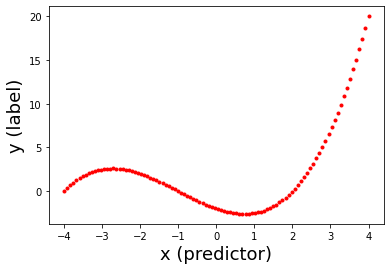

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'r.')
plt.xlabel("x (predictor)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.show()

Here is something **worth remembering**. In machine learning we **represent our dataset using arrays** and our algorithms are implemented as **operations on arrays**. In the next sections we will explore an even better way to express calculations such as our cubic model $f(x)$.

# Basic operations on arrays

The previous example should have persuaded you that working with arrays of values is better than working with each value separately. In this section we will review some of the most important operations on arrays.

First, we will use `np.array` to create a **row vector** `x_r`, specifically a vector consisting of 1 row and 3 columns, and then we will use `np.transpose` to **transpose** it into a **column vector** `x_c` consisting of 3 rows and 1 column:

In [9]:
x_r = np.array([0, 1, 2], ndmin=2)
print("Vector x_r is:\n", x_r)
print("The shape of x_r is :", x_r.shape)
x_c = np.transpose(x_r)
print("\nVector x_c is:\n", x_c)
print("The shape of x_c is:", x_c.shape)

Vector x_r is:
 [[0 1 2]]
The shape of x_r is : (1, 3)

Vector x_c is:
 [[0]
 [1]
 [2]]
The shape of x_c is: (3, 1)


Note that we could have used `x_c = np.array([[0], [1], [2]])` to produce a column vector directly, instead of producing a row vector and then using transposition.

Let's now use **column stacking** to create a **matrix** X consisting of 4 columns, specifically a column of ones and 3 columns storing the powers of `x_c` up to degree 3:

In [10]:
X = np.column_stack([np.ones(x_c.shape), x_c, x_c**2, x_c**3])
print("The design matrix X is:\n", X)
print("\nThe shape of the matrix X is", X.shape)

The design matrix X is:
 [[1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 2. 4. 8.]]

The shape of the matrix X is (3, 4)


And finally, some magic. In the following cell, we create a **column vector** `w_c` containing the coefficients of our cubic model $f(x)$ and obtain the predictions for `x_c` by calculating the matrix multiplication between `X` and `w_c` using `np.dot`:

In [11]:
w_c = np.array([[-2], [-3/2], [3/4], [1/4]])
print("The coefficients of the polynomial model are:\n", w_c)
y = np.dot(X,w_c)
print("The predicted labels are:\n", y)


The coefficients of the polynomial model are:
 [[-2.  ]
 [-1.5 ]
 [ 0.75]
 [ 0.25]]
The predicted labels are:
 [[-2. ]
 [-2.5]
 [ 0. ]]


Note that `X` represents a 3x4 matrix, `w_c` a 4x1 vector, and the output `y` is a 3x1 vector. What if we have 100 predictors? Same code, we first create a 100x4 NumPy matrix containing the powers of all the predictors and multiply it by the 4x1 coefficients vector, which returns a 100x1 prediction vector. This time, we won't print out all the predictions, as we have learnt it's not very useful:

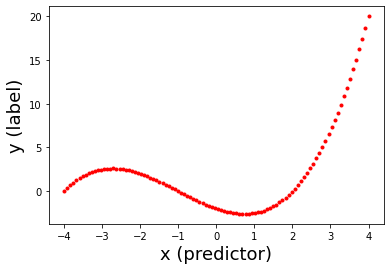

In [12]:
x_r = np.linspace(-4,4,100)
x_c = np.transpose(x_r)
X = np.column_stack([np.ones(x_c.shape), x_c, x_c**2, x_c**3])
y = np.dot(X,w_c)
plt.plot(x_c, y, 'r.')
plt.xlabel("x (predictor)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.show()

In summary:

- Our predictors have been represented as a **vector**.
- We have created a **matrix** containing as columns an all-ones column and the powers of the predictor vector up to degree 3. Note that this matrix looks like the least squares design matrix! They are indeed identical.
- We have represented the coefficients of $f(x)$ as a **vector**.
- We have obtained the predicted labels using **matrix multiplication**.

This is the **pro** way.

# Least squares

Given a family of regression models, the least squares solution is the model that minimises the mean squared error on our training dataset. Consider the folowing **multiple linear model**:

$\begin{equation}
f(x) = w_0 + w_1 x_1 + ... + w_K x_K
\end{equation}$

where $x_1, ..., x_K$ are the predictors and $w_0, ..., w_K$ are the model's parameters. If we have a dataset consisting of $N$ samples, we can obtain the parameters of the least squares solution using the **normal equations** 

$\begin{equation}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}$

where $\mathbf{w}=[w_1, ... , w_K]^T$ are the parameters of the model, $\mathbf{y}=[y_0, ..., y_N]^T$ are the true labels in the dataset and $\mathbf{X}$ is the design matrix. The least squares solution for **simple polynomial regression** can be obtained following an identical approach. Given a polynomial model

$\begin{equation}
f(x) = w_0 + w_1 x + ... + w_K x^K
\end{equation}$

we can treat $x, x^2, ..., x^K$ as separate predictors, build the corresponding design matrix $\mathbf{X}$ and use the normal equation.

As you can see from the normal equations, obtaining the least square solution involves: 

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposition**.
- **Matrix inversion**.
- **Matrix multiplication**. 

Let's explore a simple regression problem. First, we will define and plot our training dataset, which consists 10 samples described by one predictor `x` and one label `y`.

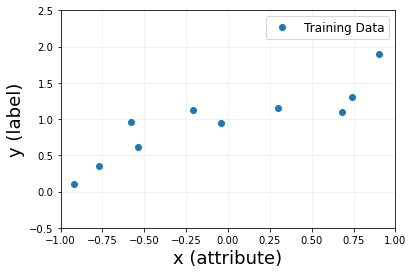

In [13]:
x = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800], ndmin=2).T
y = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951], ndmin=2).T

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Note that here we have obtained the transpose of two row vectors using `.T` instead of `np.transpose`. Both options are equivalent. The most important point is that `x` and `y` are two column vectors consisting of 10 rows and 1 column, i.e. 10x1 vectors:

In [14]:
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


Let's obtain the least squares solution for a simple linear model $f(x) = w_0 + w_1 x$. We need to calculate the design matrix first and then use the normal equation. We will show the calculations involved in the normal equations step by step:

Step 1:  $X^TX$

Step 2: $(X^TX)^{-1}$

Step 3: $(X^TX)^{-1}X^T$

In [15]:
X = np.column_stack([np.ones(x.shape), x])
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 2 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[ 1.    0.3 ]
 [ 1.   -0.77]
 [ 1.    0.9 ]
 [ 1.   -0.04]
 [ 1.    0.74]
 [ 1.   -0.58]
 [ 1.   -0.92]
 [ 1.   -0.21]
 [ 1.   -0.54]
 [ 1.    0.68]]
The 2 parameters of the least squares linear solution are
 [[0.987]
 [0.662]]


Now that we have the parameters $w_0$ and $w_1$ of the linear model, we can use them to predict the labels of 100 predictors uniformly spaced between -1 and 1:

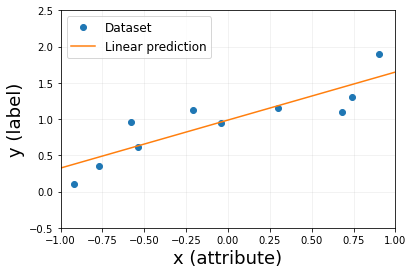

In [16]:
x_LS = np.linspace(-1,1,100).T
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS])
#print(X_LS)
y_LS = np.dot(X_LS, w)
#print(y_LS)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Let's do the same for a quadratic model. Note that our design matrix will include a new column with the squares of the predictors and instead of 2, we will have 3 parameters ($w_0$, $w_1$ and $w_2$):

The design matrix is:
 [[ 1.     0.3    0.09 ]
 [ 1.    -0.77   0.593]
 [ 1.     0.9    0.81 ]
 [ 1.    -0.04   0.002]
 [ 1.     0.74   0.548]
 [ 1.    -0.58   0.336]
 [ 1.    -0.92   0.846]
 [ 1.    -0.21   0.044]
 [ 1.    -0.54   0.292]
 [ 1.     0.68   0.462]]
The 3 parameters of the least squares quadratic solution are
 [[ 1.066]
 [ 0.665]
 [-0.197]]


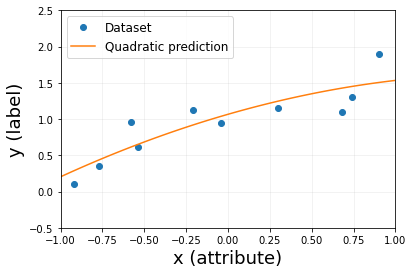

In [17]:
X = np.column_stack([np.ones(x.shape), x, x**2]) # Note we are including powers up to 3, the square of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 3 parameters of the least squares quadratic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Quadratic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

The least squares solution for a cubic model consists of four parameters and will be obtained in an identical fashion:

The design matrix is:
 [[ 1.000e+00  3.000e-01  9.000e-02  2.700e-02]
 [ 1.000e+00 -7.700e-01  5.929e-01 -4.565e-01]
 [ 1.000e+00  9.000e-01  8.100e-01  7.290e-01]
 [ 1.000e+00 -4.000e-02  1.600e-03 -6.400e-05]
 [ 1.000e+00  7.400e-01  5.476e-01  4.052e-01]
 [ 1.000e+00 -5.800e-01  3.364e-01 -1.951e-01]
 [ 1.000e+00 -9.200e-01  8.464e-01 -7.787e-01]
 [ 1.000e+00 -2.100e-01  4.410e-02 -9.261e-03]
 [ 1.000e+00 -5.400e-01  2.916e-01 -1.575e-01]
 [ 1.000e+00  6.800e-01  4.624e-01  3.144e-01]]
The 4 parameters of the least squares cubic solution are
 [[ 1.004]
 [-0.145]
 [-0.091]
 [ 1.326]]


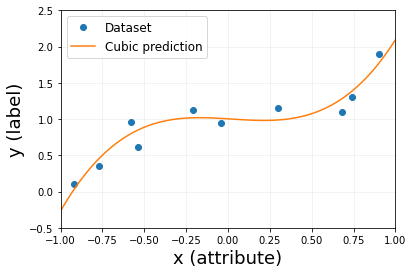

In [23]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3]) # Note we are including powers up to 3, the cube of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 4 parameters of the least squares cubic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Cubic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Finally, let's obtain the least squares solution of a polynomial of degree 4. However, lets put steps 1 to 3 into a single line of code:

The design matrix is:
 [[ 1.000e+00  3.000e-01  9.000e-02  2.700e-02  8.100e-03]
 [ 1.000e+00 -7.700e-01  5.929e-01 -4.565e-01  3.515e-01]
 [ 1.000e+00  9.000e-01  8.100e-01  7.290e-01  6.561e-01]
 [ 1.000e+00 -4.000e-02  1.600e-03 -6.400e-05  2.560e-06]
 [ 1.000e+00  7.400e-01  5.476e-01  4.052e-01  2.999e-01]
 [ 1.000e+00 -5.800e-01  3.364e-01 -1.951e-01  1.132e-01]
 [ 1.000e+00 -9.200e-01  8.464e-01 -7.787e-01  7.164e-01]
 [ 1.000e+00 -2.100e-01  4.410e-02 -9.261e-03  1.945e-03]
 [ 1.000e+00 -5.400e-01  2.916e-01 -1.575e-01  8.503e-02]
 [ 1.000e+00  6.800e-01  4.624e-01  3.144e-01  2.138e-01]]
The 5 parameters of the least squares 4-degree solution are
 [[ 1.091]
 [-0.2  ]
 [-0.932]
 [ 1.425]
 [ 1.02 ]]
[[ 1.000e+00 -1.000e+00  1.000e+00 -1.000e+00  1.000e+00]
 [ 1.000e+00 -9.798e-01  9.600e-01 -9.406e-01  9.216e-01]
 [ 1.000e+00 -9.596e-01  9.208e-01 -8.836e-01  8.479e-01]
 [ 1.000e+00 -9.394e-01  8.825e-01 -8.290e-01  7.787e-01]
 [ 1.000e+00 -9.192e-01  8.449e-01 -7.766e-01  7.139

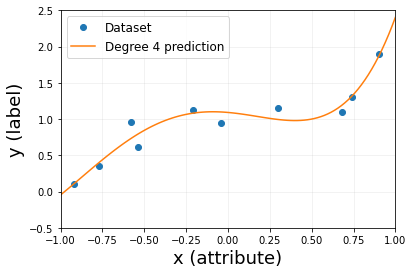

In [21]:


X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4]) # Note we are including powers up to 4!
print("The design matrix is:\n", X)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("The 5 parameters of the least squares 4-degree solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4])
y_LS = np.dot(X_LS, w)
print(X_LS)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Degree 4 prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

# Summary

In this lab, we have covered several **operations** on NumPy arrays, specifically:

- **Arithmetic operations**: `+`, `-`, `*`, `/`, `**`. 
- **Transposition**: Given a matrix `X`, its transpose is `np.transpose(X)` and also `X.T`.
- **Column stacking**: Given several vectors with the same shape, for instance `x1`, `x2` and `x3`, they can be stacked together using `np.column_stack([x1, x2, x3])`.
- **Matrix multiplication**: Given two matrices `X` and `Y` (with the right dimensions!), we can multiply them by typing `np.dot(X,Y)`.
- **Matrix inversion**: The inverse of a matrix `X` can be obtained as `np.linalg.inv(X)`.

With these basic operations, and after representing our data as NumPy arrays, we have writen code to:

- Obtain the predicted label of a dataset consisting of any number of samples.
- Obtain the least square solution for linear and polynomial models.

When you are ready, have a go at the quiz. You will need to use one of the datasets from the regression exercises.
